#1. 교차 검증이란
> 데이터를 훈련데이터와 검증데이터로 분리하여 모델을 검증하는 방법이다. 기존에 훈련데이터와 테스트데이터로 구분하여 학습하다 보면 고정된 테스트데이터에만 잘 동작되는 모델이 될 수 있다. 이를 과적합(overfitting)이라고 하는데 이러한 문제를 해결 하기 위해 교차 검증을 사용한다.

##1.1 장단점

###1.1.1 장점
>* 모든 데이터를 훈련에 활용할 수 있어 정확도가 향상되고 부족한 데이터로 인해 발생되는 underfitting을 방지할 수 있다.
* 모든 데이터 셋을 평가에 활용할 수 있음으로 평가에 사용되는 데이터 편중을 막을 수 있고 평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있다.

###1.1.2 단점
>* 반복 횟수가 많기 때문에 모델 훈련 및 평가 시간이 오래 걸린다.

#2. 교차 검증 기법

##2.1 K - 겹 교차 검증(K-Fold Cross Validation)

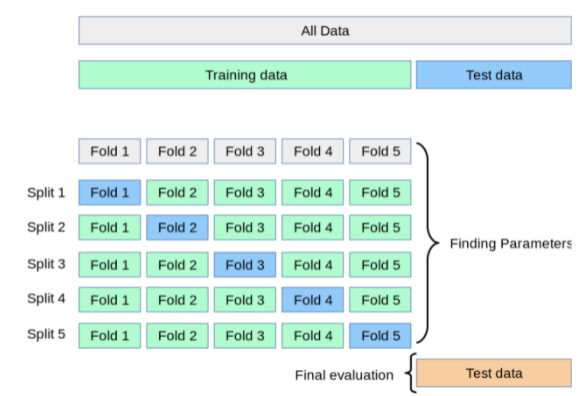

> 훈련데이터를 훈련 데이터와 검증 데이터를 분리하고 위와 같이 교차로 학습을 진행하여 모델을 성능을 향상시킨다.

##2.2 실습

###2.2.1 데이터 읽기

> Quiz
- iris 정보를 읽어 들이고 데이터와 타겟 정보를 각각 5개씩 출력하시오

In [36]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
label = iris.target

In [37]:
print(iris_data[:5])
print(label[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


###2.2.2 교차검증

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

> 모델 생성을 위해 의사결정트리를 준비한다.

In [68]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=5)

> 교차 검증을 위해 kfold를 준비한다.

In [40]:
# shape이라는 것은 데이터의 모양을 보여준다.
iris_data.shape
# 행의 개수
iris_data.shape[0]
# 열(feature)의 개수
iris_data.shape[1]

4

In [41]:
# 교차 검증을 진행할 때 나오는 결과를 저장하기 위해 cv_accuracy라는 리스트를 생성한다.
cv_accuracy=[]
print('붓꽃 데이터 세트 크기', features.shape[0])

붓꽃 데이터 세트 크기 150


In [ ]:
for train_idx, test_idx in kfold.split(iris_data):
  print('train_idx : ', train_idx)
  print('test_idx : ', test_idx)
  print('================================')

>kfold.split을 통해 훈련용 데이터와 검증용 데이터를 나뉘게 된다. 나누는 기준은 위에서 KFold 클래스를 선언할 경우 적용한 n_splits의 수치만큼 나누게 된다. 실행 결과 위의 그림에서와 같이 모든 데이터를 훈련용과 검증용으로 사용하는 것을 볼 수 있다.

In [ ]:
for train_idx, test_idx in kfold.split(features):
  # 훈련용 데이터
  X_train = features[train_idx]
  y_train = label[train_idx]

  # 검증용 데이터
  X_test = features[test_idx]
  y_test = label[test_idx]

  print('X_train : ', X_train[:3])
  print('y_train : ', y_train[:3])
  print('X_test : ', X_test[:3])
  print('y_test : ', y_test[:3])
  print('==========================')

> train_idx, test_idx는 위치 정보임으로 실 데이터를 얻기 위해 iris_data와 iris_label의 데이터를 얻오 왔다. 이 정보를 이용하여 추후 모델을 만들고 학습시킬 것이다.

In [44]:
from sklearn.metrics import accuracy_score

n_iterate = 1

for train_idx, test_idx in kfold.split(features):
  X_train = features[train_idx]
  y_train = label[train_idx]

  X_test = features[test_idx]
  y_test = label[test_idx]

  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  #정확도 측정
  accuracy = round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n{0} 교차 검증 정확도 : {1}, 학습데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iterate, accuracy, train_size, test_size))
  print('\n{0} 검증 세트 인덱스 : {1}'.format(n_iterate, test_idx))
  print('='*100)
  n_iterate+=1


1 교차 검증 정확도 : 1.0, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차 검증 정확도 : 1.0, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차 검증 정확도 : 0.8667, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차 검증 정확도 : 0.9333, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차 검증 정확도 : 0.8333, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


> 첫 번째와 두 번째 교차 검증 시 100% 예측이 나왔으며 이는 테스트용 데이터에 맞춰진 과적합된 결과로 볼 수 있다. 세 번째 데이터에서는 예측률이 떨어 졌으며 마지막 데이터에서는 더 떨어진 결과가 나왔다. 하지만 하나의 데이터로 여러번 교차해서 학습시킴으로써 예측 정확도를 더 올릴수 있는 결과를 얻게 된다.

In [69]:
import numpy as np

n_iterate = 1

for train_idx, test_idx in kfold.split(iris_data):
  X_train = iris_data[train_idx]
  y_train = label[train_idx]

  X_test = iris_data[test_idx]
  y_test = label[test_idx]

  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  #정확도 측정
  accuracy = round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n{0} 교차 검증 정확도 : {1}, 학습데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iterate, accuracy, train_size, test_size))
  print('\n{0} 검증 세트 인덱스 : {1}'.format(n_iterate, test_idx))
  print('='*100)
  n_iterate+=1

  #정확도 수집
  cv_accuracy.append(accuracy)

print('\n\n## 평균 검증 정확도 : ', round(np.mean(cv_accuracy), 4))


1 교차 검증 정확도 : 1.0, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차 검증 정확도 : 0.9667, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차 검증 정확도 : 0.8667, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차 검증 정확도 : 0.9333, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차 검증 정확도 : 0.9, 학습데이터 크기 : 120, 검증 데이터 크기 : 30

5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


## 평균 검증 정확도 :  0.9167


> 최종적으로 교차검증된 정확도의 평균이 92%가 나왔다. 이를 모델에 대한 정확도 가 아닌 교차 검증의 평균 정확도이다.

> 위의 내용을 정리하고 마무리되면 위의 모델에 train_test_split으로 얻은 새로운 데이터로 정확도를 구해보자(단, randoa_state는 이전에 사용했던 62로 통일한다.)

In [76]:
x_test=[[5.0,5.0,1.0,1.0]]
dt_clf.predict(x_test)
# X_test


array([0])

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=62)

pred = dt_clf.predict(X_test)
accuracy = round(accuracy_score(y_test, pred), 4)
accuracy

1.0

#3. Stratified K Fold
> 불균형한 분포도를 가진 레이블 데이터 집합을 위한 방식이다. 대출 사기 데이터를 예측할 경우 1억개의 데이터 중 1000개의 데이터가 대출 사기 데이터이다. 이런 경우 정상적인 데이터와 대출 사기 데이터가 적절히 분포될 확율이 적음으로 기존의 K 겹 교차 검증으로는 모델을 검증하기 어려워 진다.

In [47]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['label']=iris.target
df_iris[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


>iris 데이터를 읽어 들여 dataframe으로 만든다.

In [48]:
df_iris['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

> 현재 label의 value에 대한 갯수는 50개씩 균등하게 나누어져 있다. 만약 훈련데이터가 0, 1이고 테스트 데이터가 2이면 정확도는 0로 나타나게 될것이다.

In [49]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)

cnt = 1

for train_idx, test_idx in kfold.split(df_iris):
  label_train = df_iris['label'].iloc[train_idx]
  label_test = df_iris['label'].iloc[test_idx]

  print('##교차 검증 : ', cnt)
  print('학습 레이블 데이터 분포 : ')
  print(label_train.value_counts())
  print('검증 레이블 데이터 분포 : ')
  print(label_test.value_counts())
  cnt += 1
  print('='*50)

##교차 검증 :  1
학습 레이블 데이터 분포 : 
1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
0    50
Name: label, dtype: int64
##교차 검증 :  2
학습 레이블 데이터 분포 : 
0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
1    50
Name: label, dtype: int64
##교차 검증 :  3
학습 레이블 데이터 분포 : 
0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
2    50
Name: label, dtype: int64


> 위와 같은 경우 학습 레이블과 검증 레이블이 겹쳐지는 것이 없음으로 예측 정확도는 0이 될 수 밖에 없다.

In [50]:
from sklearn.model_selection import StratifiedKFold

Skfold = StratifiedKFold(n_splits=3)

n_iterate=1

for train_idx, test_idx in Skfold.split(df_iris, df_iris['label']):
  label_train = df_iris['label'].iloc[train_idx]
  label_test=df_iris['label'].iloc[test_idx]
  print('## 교차검증 : {0}'.format(n_iterate))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())
  n_iterate+=1
  print('='*50)

## 교차검증 : 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차검증 : 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차검증 : 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


> StratifiedKFold의 split함수는 feature와 label을 넣어 주어야 한다.

>출력결과를 확인해 보면 학습 레이블과 검증 레이블이 고르게 나타나는 것을 볼 수 있다.

##3.1 Quiz
> 이전 K Fold로 진행했던 검증 프로그램을 위의 내용으로 변경해 보시오

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
skfold = StratifiedKFold(n_splits=3)
# StratifiedKFold의 split시 첫 인자는 데이터, 두 번째 인자는 결과가 들어가야 함으로 drop함수 사용
for train_idx, test_idx in skfold.split(df_iris.drop(['label'], axis=1), df_iris['label']):
  X_train = df_iris.drop(['label'], axis=1).iloc[train_idx]
  y_train = df_iris['label'].iloc[train_idx]
  
  dt_clf.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(df_iris.drop(['label'], axis=1), 
                                                    df_iris['label'], test_size=0.2, random_state=62)
pred = dt_clf.predict(X_test)
accuracy = round(accuracy_score(y_test, pred), 4)
accuracy

1.0

>feature 정보에 df_iris만 넣어도 상관은 없다. index의 정보만 얻기 위해 사용되는 정보이다.

#4. cross_val_score()
> sklearn에서 지원해 주는 교차 검증 API이다.
* cross_val_score(estimator, X, y=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
 * estimator : 분류 알고리즘(Classifier) 또는 회귀 알고리즘(Regressor)
 * X : feature dataset
 * y : label dataset
 * scoring : 예측 성능 평가 지표
 * cv : 교차 검증 폴드 수
* 분류 알고리즘이 입력되면 Stratified K Fold를 회귀 알고리즘이 입력되면 K Fold로 분할한다.





##4.1 교차 검증 확인

In [52]:
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data
label = iris.target

> iris 정보를 얻고 features와 lable을 추출한다.

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier()
scores = cross_val_score(dt_clf, X=features, y=label, scoring='accuracy', cv=3)

>현재 사용되는 알고리즘은 의사 결정 트리(DecisionTreeClassifier)로 분류 알고리즘이기 때문에 Stratified K Fold로 교차 검증을 하게 된다. scoring='accuracy'를 이용하여 정확도에 따른 검증을 하게 되며 cv=3으로 3개의 교차 검증을 진행하게 된다.

In [54]:
import numpy as np

print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.98 0.92 0.98]
평균 검증 정확도 :  0.96


##4.2 교차검증 vs 비교차검증

###4.2.1. 교차 검증 결과 확인

In [55]:
from sklearn.model_selection import train_test_split

dt_clf2 = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(features, label)
scores = cross_val_score(dt_clf2, X=X_train, y=y_train, scoring='accuracy', cv=3)

In [56]:
import numpy as np

print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.9737 0.9459 0.8919]
평균 검증 정확도 :  0.9372


###4.2.2 비교차 검증과 비교

In [57]:
dt_clf3 = DecisionTreeClassifier()
dt_clf3.fit(X_train, y_train)

dt_clf2.fit(X_train, y_train)

pred1 = dt_clf2.predict(X_test)
pred2 = dt_clf3.predict(X_test)

print(pred1)
print(pred2)

[1 0 2 1 1 1 1 1 2 2 2 2 0 1 0 0 0 1 2 0 2 1 2 0 1 0 2 0 0 1 1 1 0 1 2 1 2
 1]
[1 0 2 1 2 1 1 1 2 2 2 2 0 1 0 0 0 1 2 0 2 1 2 0 1 0 2 0 0 1 1 1 0 1 2 1 2
 1]


In [58]:
from sklearn.metrics import accuracy_score
print('예측 정확도(교차검증 후) :  {0:.4f}'.format(accuracy_score(y_test, pred1)))
print('예측 정확도(교차검증 전) :  {0:.4f}'.format(accuracy_score(y_test, pred2)))

예측 정확도(교차검증 후) :  0.9737
예측 정확도(교차검증 전) :  0.9474


#5. GridSearchCV


> GridSearchCV를 이용하여 모델에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터를 도출

##5.1 GridSearch의 주요 파라미터


* estimator : 적용 알고리즘 모델로 classifier, regressor, pipeline 등이 사용
* param_grid : ket+리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지어
* scoring : 예측 성능을 평가할 평가 방법을 지정, 문자열로 사이킷런의 성능평가 지표를 입력하나 별도의 함수 지정도 가능
* refit : 기본값은 True이며 True로 생성시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파리미터로 재학습시킴

##5.2 데이터 분류

In [59]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=62)

##5.3 파라미터 설정

> DecisionTreeClassifier에 사용되는 파라미터 중 최적의 파라미터를 찾기 위해 임의의 데이터를 적용한다.

In [60]:
grid_parameters = {
    'max_depth':[1,2,3],
    'min_samples_split':[2,3]
    }

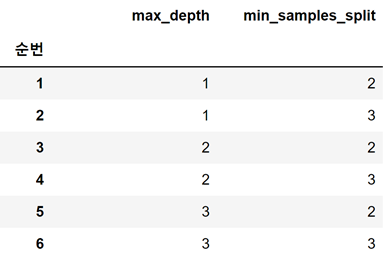

> grid_parameters는 위처럼 모든 경우의 수를 적용하여 최적의 알고리즘을 사용할 수 있게 된다.

##5.4 GridSearchCV에 모델과 파라미터 적용

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier()

grid_dtree = GridSearchCV(dt_clf, param_grid=grid_parameters, cv=3, refit=True)

>분류 알고리즘은 결정 트리를 이용하며 폴딩(cv)은 3개를 설정했다. refit이 true이므로 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 DecisionTreeClassifier를 해당 하이퍼 파리미터로 재학습시킨다.

In [62]:
import pandas as pd

grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 데이터 프레임으로 반환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.666667,5,0.650,0.675,0.675
1,"{'max_depth': 1, 'min_samples_split': 3}",0.666667,5,0.650,0.675,0.675
2,"{'max_depth': 2, 'min_samples_split': 2}",0.933333,1,0.975,0.925,0.900
3,"{'max_depth': 2, 'min_samples_split': 3}",0.933333,1,0.975,0.925,0.900
4,"{'max_depth': 3, 'min_samples_split': 2}",0.925000,3,0.975,0.900,0.900
5,"{'max_depth': 3, 'min_samples_split': 3}",0.925000,3,0.975,0.900,0.900


> 위의 feature는 다음과 같은 의미를 갖는다.
* params : 적용한 개별 하이퍼 파라미터 값
* rank_test_score : 성능이 좋게 나온 score 순위
* mean_test_score : 개별 하이퍼파라미터별로 CV 폴딩 테스트의 평가 평균 값
* split0_test_score : 폴딩(cv=3)당 테스트한 결과

In [63]:
print('GridSearch 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearch 최고 점수: ', grid_dtree.best_score_)

GridSearch 최적 파라미터:  {'max_depth': 2, 'min_samples_split': 2}
GridSearch 최고 점수:  0.9333333333333332


> DecisionTree에서 max를 3으로 min을 3로 설정하면 최적의 모델을 만들 수 있다.

In [64]:
from sklearn.metrics import accuracy_score
# GridSearchCV의 refit으로 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estmator_ 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print(X_test[:3])
print(pred)
print(y_test)
print('테스트 데이터세트 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

[[6.7 3.3 5.7 2.5]
 [6.4 2.8 5.6 2.2]
 [5.2 4.1 1.5 0.1]]
[2 2 0 0 2 2 2 0 1 1 2 1 0 1 1 1 0 1 0 0 0 0 2 1 2 0 2 0 2 0]
[2 2 0 0 2 1 2 0 1 1 2 2 0 1 1 1 0 1 0 0 0 0 2 1 2 0 2 0 2 0]
테스트 데이터세트 정확도:  0.9333


> best_estimator_은 최적이 파라미터가 적용된 모델 정보를 갖게 되며 이를 통해 예측값을 얻을 수 있다.